# COGS 108 - EDA Checkpoint

# Names

- Nilou Shahbandi
- Leonardo Gonzalez
- Brian Chen
- Tin-Trung Pham
- Zhongkang(ken) Fang

<a id='research_question'></a>
# Research Question

*How do different pollutants in California impact the rate of cancer in individuals, and how does pollutants affect rate of Asthma?*

# Setup

In [28]:
## YOUR CODE HERE
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

import seaborn as sns



In [29]:
aqi_2010 = pd.read_csv('data/aqireport2010.csv')
county_cancer = pd.read_csv('data/countyCancer.csv')
asthma = asthma = pd.read_csv('data/Asthma.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [30]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [31]:
# Data cleaning for AQI_2010

def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output



In [32]:
# Data cleaning for AQI_2010 continued
aqi_2010.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2010.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2010['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2010.head()

,county,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,alameda,245,4,68.0,43.0
1,amador,302,10,64.0,35.0
2,butte,208,13,84.0,47.0
3,calaveras,271,12,84.0,41.0
4,colusa,322,1,49.0,38.0


In [33]:
# Data Cleaning for county_cancer_2010
# filter year 2010
county_cancer_2010 = county_cancer[county_cancer['Year'] == 2010]
county_cancer_2010 = county_cancer_2010[county_cancer_2010['Age'] == 'All Ages']
county_cancer_2010.drop(['Sex', 'Race/Ethnicity', 'Age', 'Stage at Diagnosis', 'Age-adjusted Rate Standard Error', 'Year',
                         'Age-adjusted Rate Lower Confidence Interval', 'Age-adjusted Rate Upper Confidence Interval'], 
                 inplace = True, axis=1)
county_cancer_2010['California Region'] = county_cancer_2010['California Region'].apply(standardize_region)
county_cancer_2010.columns = ['county', 'rate per 100,000', 'count']
county_cancer_2010.head()

,county,"rate per 100,000",count
0,alameda,44.8118,646
1,butte,63.0616,171
2,contra costa,50.2429,536
3,el dorado,54.2364,124
4,fresno,51.7782,401


In [34]:
county_cancer_2010.dtypes
county_cancer_2010['rate per 100,000'] = county_cancer_2010['rate per 100,000'].astype(float)
county_cancer_2010['count'] = county_cancer_2010['count'].astype(int)

In [35]:
# combine aqi and cancer data
# year: 2010

# drop the county with combined cancer value
# we drop them instead of taking the average because there are significant differences for the AQI values 
county_cancer_2010 = county_cancer_2010.drop(county_cancer_2010.index[39:47])


aqi_cancer_2010 = pd.merge(county_cancer_2010, aqi_2010, on='county')
aqi_cancer_2010.head()

,county,"rate per 100,000",count,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,alameda,44.8118,646,245,4,68.0,43.0
1,butte,63.0616,171,208,13,84.0,47.0
2,contra costa,50.2429,536,307,8,64.0,39.0
3,el dorado,54.2364,124,251,23,93.0,42.0
4,fresno,51.7782,401,99,65,130.0,70.0


In [36]:
def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output

In [37]:
# data cleaning for asthma 
asthma.columns = asthma.columns.str.lower()

asthma = asthma.rename(columns={"childcount": "child", "percent": "child_percent", "adultcount": "adult",'percent.1': 'adult_percent'})

asthma = asthma.fillna(2018)
asthma["year"] = asthma["year"].astype(int)

In [38]:
asthma.dtypes

state            object
child            object
child_percent    object
year              int64
adult            object
adult_percent    object
dtype: object

In [39]:
# taking out commas and percent signs
asthma['child']= asthma['child'].str.replace(',', '')
asthma['adult']= asthma['adult'].str.replace(',', '')
asthma['child_percent']= asthma['child_percent'].str.replace('%', '')
asthma['adult_percent']= asthma['adult_percent'].str.replace('%', '')

# function to remove empty values
def standardize_asthma(string):
    if string == '---':
        string = np.nan

    return string

In [40]:
asthma['child'] = asthma['child'].apply(standardize_asthma)
asthma = asthma.dropna(subset=['child'])

asthma.head()

,state,child,child_percent,year,adult,adult_percent
0,Alabama,141500,13.20,2014,394600,10.50
2,Arizona,129200,8.10,2016,545100,10.00
4,California,542700,6.20,2018,2607600,8.50
6,Connecticut,62400,9.70,2018,290300,10.30
8,District of Columbia,12700,10.90,2018,66400,11.60


In [41]:
# converting from string to a float
asthma['child']= asthma['child'].astype(float)
asthma['adult']= asthma['adult'].astype(float)
asthma['child_percent']= asthma['child_percent'].astype(float)
asthma['adult_percent']= asthma['adult_percent'].astype(float)
asthma.head()

,state,child,child_percent,year,adult,adult_percent
0,Alabama,141500.0,13.2,2014,394600.0,10.5
2,Arizona,129200.0,8.1,2016,545100.0,10.0
4,California,542700.0,6.2,2018,2607600.0,8.5
6,Connecticut,62400.0,9.7,2018,290300.0,10.3
8,District of Columbia,12700.0,10.9,2018,66400.0,11.6


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [42]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [ ]:
asthma.describe()

In [ ]:
asthma.groupby('year').describe()

In [ ]:
sns.lineplot(x='year', y= 'child', data= asthma)

In [ ]:
sns.lineplot(x='year', y= 'adult', data= asthma)

### Descriptive Data Analysis (Cancer)

In [26]:
county_cancer_2010.shape

(39, 3)

In this data set from 2010, it lists the rates and counts of lung and bronchus cancer from counties in California. However, due to small sample sizes in certain counties, 39 counties are listed in this dataset.

In [43]:
county_cancer_2010.describe()

,"rate per 100,000",count
count,39.000000,39.000000
mean,50.203936,416.897436
std,8.513769,636.448154
min,32.617200,18.000000
25%,44.540850,88.500000
50%,50.242900,198.000000
75%,54.977300,434.000000
max,68.252400,3688.000000


Across these 39 listed counties, we can see that the mean cancer rate is 50.2 cases per 100,000 people. This equates roughly to 417 individuals. It's important to note that there is a small standard deviation in the number of cases (8.5) but a large deviation in the counts (636). 

### Exploratory Data Analysis (Cancer)

In [47]:
county_cancer_2010.head()

,county,"rate per 100,000",count
0,alameda,44.8118,646
1,butte,63.0616,171
2,contra costa,50.2429,536
3,el dorado,54.2364,124
4,fresno,51.7782,401


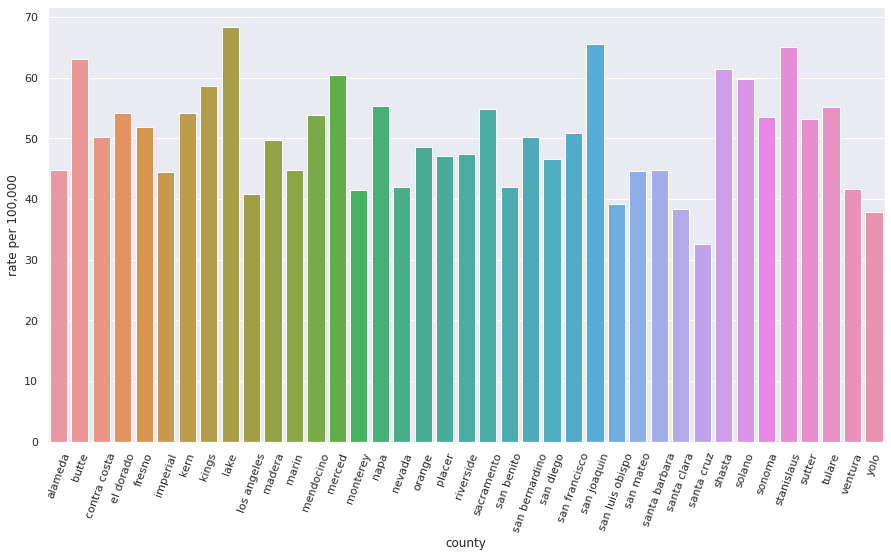

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
cc_2010_plot = sns.barplot(x ='county',y = 'rate per 100,000', data = county_cancer_2010)
cc_2010_plot.set_xticklabels(county_cancer_2010['county'], rotation = 70);

It is nice to see that generally across the 39 listed counties, the rates are relatively close. There are noticeable outliers in our data, but it is clear a few counties such as Butte, Lake, San Joaquin, and Stanislaus rank among the highest in cancer rate.

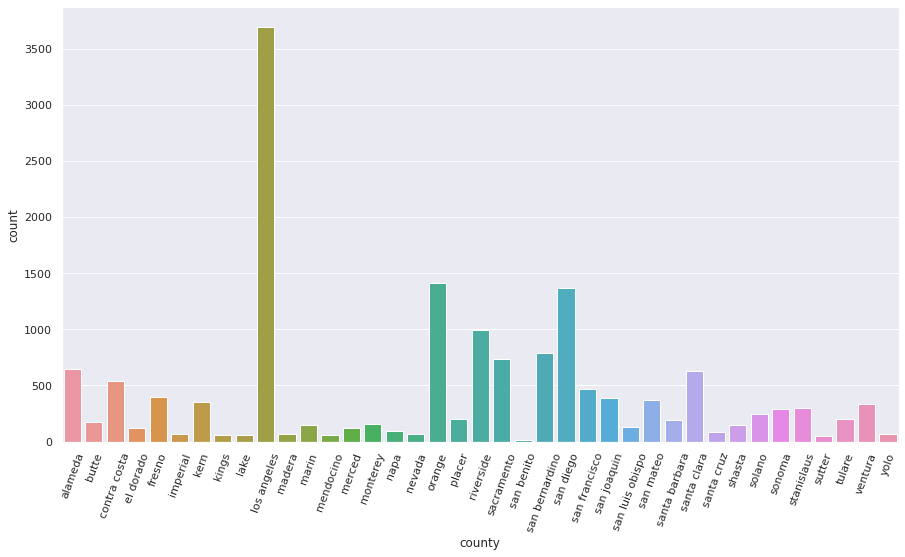

In [56]:
sns.set(rc = {'figure.figsize':(15,8)})
cc_2010_count_plot = sns.barplot(x ='county',y = 'count', data = county_cancer_2010)
cc_2010_count_plot.set_xticklabels(county_cancer_2010['county'], rotation = 70);

From this plot, we can see that Los Angeles has a lung and bronchus cancer rate that skyrockets far above the other counties. However, it's rate is not sur

### Descriptive Data Analysis(AQI)


In [44]:
aqi = pd.read_csv('data/aqireport2010.csv')
aqi.head()

,County Code,County,# Days with AQI,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous,AQI Maximum,AQI 90th Percentile,AQI Median,# Days CO,# Days NO2,# Days O3,# Days PM2.5,# Days PM10
0,6001,"Alameda County, CA",365,245,115,4,1,.,.,179,68.0,43.0,.,24,135,206,.
1,6005,"Amador County, CA",361,302,48,10,1,.,.,151,64.0,35.0,.,.,361,.,.
2,6007,"Butte County, CA",365,208,144,13,.,.,.,126,84.0,47.0,.,.,264,101,.
3,6009,"Calaveras County, CA",365,271,81,12,1,.,.,154,84.0,41.0,.,.,309,56,.
4,6011,"Colusa County, CA",353,322,30,1,.,.,.,119,49.0,38.0,.,.,305,43,5


<br />
We have a dataset from 53 different counties In California. Across these counties, the mean number of days in the year having AQI value 0 through 50 is 221.9 days. <br /><br />The median AQI value is 45.29. <br />
90% of  daily AQI values during the year were less or equal to 80.59.

<br />

In [45]:
aqi.describe()

,County Code,# Days with AQI,Good,AQI Maximum,AQI 90th Percentile,AQI Median
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,6057.943396,350.396226,221.943396,305.603774,80.594340,45.292453
std,33.121231,57.358300,93.189719,810.730899,32.567542,15.517185
min,6001.000000,110.000000,31.000000,35.000000,21.000000,9.500000
25%,6029.000000,365.000000,163.000000,119.000000,58.000000,38.000000
50%,6059.000000,365.000000,248.000000,154.000000,80.000000,43.000000
75%,6085.000000,365.000000,295.000000,187.000000,93.000000,50.000000
max,6113.000000,365.000000,358.000000,4466.000000,164.000000,87.000000


### Exploratory Data Analysis(AQI)

/tmp/ipykernel_199/1774364772.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(aqi['County'], rotation = 70);


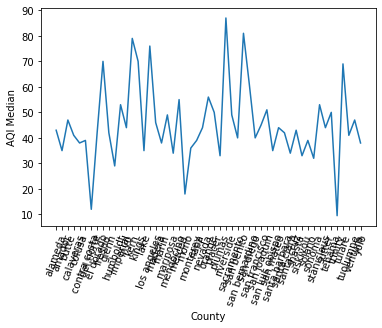

In [46]:
#style.use('fivethirtyeight')
aqi['County'] = aqi['County'].apply(standardize_region)
ax = sns.lineplot(x ='County',y = 'AQI Median', data = aqi)
ax.set_xticklabels(aqi['County'], rotation = 70);


The plot we shows that all county have moderate or good AQI value. Some counties have good AQI value (0-50), while some counties have moderate AQI value (50-100).

In [ ]:
aqi_unhealthy = aqi[aqi['Unhealthy for Sensitive Groups'] != '.']
aqi_unhealthy['Unhealthy for Sensitive Groups'] = aqi_unhealthy['Unhealthy for Sensitive Groups'].astype(int)
ax = sns.lineplot(x ='County',y = 'Unhealthy for Sensitive Groups', data = aqi_unhealthy)
ax.set_xticklabels(aqi['County'], rotation = 70);